## **Don't Overfit!**

# **1. Business Problem**

### **1.1 Description :**

We use the Overfitting term when our model is training data too well, that is when a model learns  all the important features including outliers too in the training data so well that it can impact our model negatively in terms of performance of the model on unseen data .

From a business point of view, in every model at the time of training ,checking if the model is overfitting or not is very important .


### **Problem :**

Here we have given a challenge to train the model with only 250 data points .Other data sets generally have sufficient data 
points to work on and this is not a hard and fast rule that we should have sufficient data all the time. Often when dealing with real world datasets we encounter problems like these. So it is very important to know how to overcome overfitting .


# **1.2 Sources/Useful Links**

 **SOURCE:-** We can download the data from [Don't Overfit! II](https://www.kaggle.com/mdmub0587/older-dataset-for-dont-overfit-ii-challenge/download)

---
 **Research Papers :**</br>
 

*   [An Overview of Overfitting and its Solutions](https://iopscience.iop.org/article/10.1088/1742-6596/1168/2/022022/pdf)</br></br>
*   [How to avoid Overfitting in your Machine Learning](https://towardsdatascience.com/dont-overfit-ii-how-to-avoid-overfitting-in-your-machine-learning-and-deep-learning-models-2ff903f4b36a)</br></br>

*   [Class Imbalance | Handling Imbalanced Data Using Python](https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/)</br></br>

*   [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)</br></br>

*   [Techniques to Prevent Overfitting in Neural Networks](https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html)
</br></br>

*   [Recursive Feature Elimination with XGBoost and Logistic Regression](https://www.kaggle.com/pierresylvain/xgboost-lr-rfe)</br></br>


# **1.3 Real world/Business Objectives and Constraints**


1.   No strict latency concerns.
2.   Interpretability is important.
3.   Cost of overfitting will be very high



# **2. Machine Learning Probelm**
 
## **2.1 Data**</br>
### **2.1.1 Data Overview**
</br>
Files</br>

Data will be in a file train.csv,test.csv,sample_submission.csv</br>
*  train.csv - the training set contains **250 rows** --> size 471 KB</br>
*  test.csv - the test set contains **19,750 rows** --> size 36.2 MB </br>
*  sample_submission.csv - a sample submission file in the correct format i.e the format in which we have to submit our output in kaggle for evaluation --> 
144 KB</br>
</br>


---

</br>

 **Data Set contains 302 columns :** ID, Target, 0-299 continuous variable features 
 </br></br>

 ---
</br>

### **2.1.2 Example Data point**
</br>

---
</br>
id	target	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	...	260	261	262	263	264	265	266	267	268	269	270	271	272	273	274	275	276	277	278	279	280	281	282	283	284	285	286	287	288	289	290	291	292	293	294	295	296	297	298	299
</br>
</br>

___
</br>
0	0	1.0	-1.067	-1.114	-0.616	0.376	1.090	0.467	-0.422	0.460	-0.443	-0.338	0.416	-2.177	-0.326	0.340	1.174	-0.245	-1.070	-0.336	-0.502	0.403	-0.605	-0.280	-1.618	0.878	-0.272	0.870	2.171	-0.214	0.477	-2.092	0.835	0.621	-2.810	1.029	-0.736	0.582	-0.079	0.493	...	0.055	1.107	-0.848	-1.781	0.254	-0.515	0.234	0.296	-1.774	2.032	-0.442	-0.116	1.393	-0.494	-0.179	1.874	1.463	-1.397	0.284	0.336	0.551	0.557	-0.522	-0.503	-0.541	1.393	0.506	-1.420	-0.123	-1.833	0.220	-0.339	0.254	-0.179	0.352	0.125	0.347	0.436	0.958	-0.824
</br></br>

___


## **2.2 Mapping the real world problem to an ML problem**
</br>
In this case study , we are mainly focusing on using different machine learning and deep learning algorithms on these types of dataset , and study how each model is getting affected by overfitting and what should be done to prevent it .
</br>
</br>

### **2.2.1 Type of Machine Leaning Problem**
</br>

This is basically a Binary Class classification problem, although the data has no connection with the real world scenario. Where we are given a dataset of 20,000 rows and 302 features , and we are supposed to train the model on only 250 data points and test it on the remaining 19,750 data points. With 302 features including id , target , 0-299 are continuous variables
</br>
</br>
</br>

**2.2.2 Performance Metric**
</br>
</br>

Source: https://www.kaggle.com/c/dont-overfit-ii/overview/evaluation</br>
Metric(s):

*  AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic</br>

In [1]:
#importing basics libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import scipy
import numpy as np
import random
import re
#ignoring warning
#https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings
warnings.filterwarnings('ignore')
# !pip install seaborn_qqplot
# from seaborn_qqplot import pplot as qq_plot
from matplotlib.pyplot import figure
import math
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
# !pip install kmeans_smote
# from kmeans_smote import KMeansSMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzipping file
!unzip "/content/drive/MyDrive/Case Study 1/dataset.zip"

Archive:  /content/drive/MyDrive/Case Study 1/dataset.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
#reading train.csv file using pandas
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df_train=pd.read_csv("/content/train.csv")

In [4]:
#reading test.csv file using pandas
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df_test=pd.read_csv("/content/test.csv")

## Exploratory data analysis (EDA)

 **Univariate Analysis** 

In [ ]:
#print train dataset
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
df_train.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,...,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,...,0.971,-1.489,0.530,0.917,-0.094,-1.407,0.887,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,...,-0.540,-0.299,1.074,-0.748,1.086,-0.766,-0.931,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,...,-0.083,-0.831,1.251,-0.206,-0.933,-1.215,0.281,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,0.190,0.453,0.494,1.478,-1.412,0.270,-1.312,-0.322,-0.688,-0.198,-0.285,1.042,-0.315,-0.478,0.024,-0.190,1.656,-0.469,-1.437,-0.581,-0.308,-0.837,-1.739,0.037,0.336,-1.102,2.371,0.554,...,-1.050,-0.347,0.904,-1.324,-0.849,3.432,0.222,0.416,0.174,-1.517,-0.337,0.055,-0.464,0.014,-1.073,0.325,-0.523,-0.692,0.190,-0.883,-1.830,1.408,2.319,1.704,-0.723,1.014,0.064,0.096,-0.775,1.845,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [ ]:
#printing all the features we had in our dataset
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html
for i in df_train.columns: print(i,end=" , ")

id , target , 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 , 100 , 101 , 102 , 103 , 104 , 105 , 106 , 107 , 108 , 109 , 110 , 111 , 112 , 113 , 114 , 115 , 116 , 117 , 118 , 119 , 120 , 121 , 122 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 132 , 133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 144 , 145 , 146 , 147 , 148 , 149 , 150 , 151 , 152 , 153 , 154 , 155 , 156 , 157 , 158 , 159 , 160 , 161 , 162 , 163 , 164 , 165 , 166 , 167 , 168 , 169 , 170 , 171 , 172 , 173 , 174 , 175 , 176 , 177 , 178 , 179 , 180 , 181 , 182 

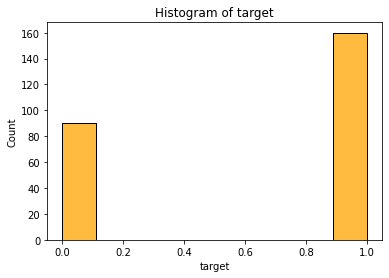

####################################################################################################
Number of Positive Data Points:  160
Number of Negative Data Points:  90


In [ ]:
# plotting histogram of target
#https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.title("Histogram of target")
sns.histplot(df_train["target"],color="orange")
plt.show()
print("#"*100)
print("Number of Positive Data Points: ",list(df_train["target"]).count(1))
print("Number of Negative Data Points: ",list(df_train["target"]).count(0))

Observation:</br></br> 
Note: For simplicity i am considering 0 as positive class and 1 as negative class</br></br>

---


Data Set is **'imbalanced'** as because the probability of occurence of positive class data points is only **36%**, Negative class Data points its almost **1.78 times** the number of Postive class Data point.</br></br>

---


For every points we had given target labels as they does not exist any **NaN** value in target, because the count is satisfying the relation </br>--> **total** number of datapoints= **Σ** (number of **Ci** class Data Points) </br>--> **total** number of datapoints = number of **positive** datapoints + number of **negative** data points </br>-->  250=90+160



In [ ]:
#finding nan/missing values 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html
pd.DataFrame((df_train.notna()).all(),columns=["is not nan"])

,is not nan
id,True
target,True
0,True
1,True
2,True
...,...
295,True
296,True
297,True
298,True


Observation:</br></br>
None of the feature has any missing/nan values, i.e we have complete data set with all the values.

####################################################################################################
selected_random_feature:-  269
####################################################################################################


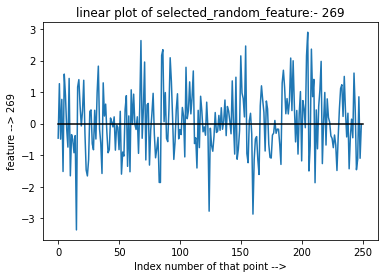

In [ ]:
#ploting any random continuous varible feature lieanr plot
#########################################################################################
# https://docs.python.org/3/library/random.html
selected_random_feature=random.randint(0,299)
#########################################################################################
print("#"*100)
print("selected_random_feature:- ",selected_random_feature)
print("#"*100)
##########################################################################################
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.title("linear plot of "+"selected_random_feature:- "+str(selected_random_feature))
plt.plot(df_train[str(selected_random_feature)])
plt.ylabel("feature --> "+str(selected_random_feature))
plt.xlabel("Index number of that point -->")
#plotting y=0 line for better visualization
plt.plot([0,len(df_train)],[0,0],color="black")
plt.show()

Observation</br></br>
Most of the value lies in between **2 to -2** and also they are equally distributed with the negative and positive values, as i plot this many times for randomly selected features it shows me the similar behaviour that means almost all the continuous varaible have similar distribution and also seems to be **symmetric** 


####################################################################################################
selected_random_feature:-  155
####################################################################################################


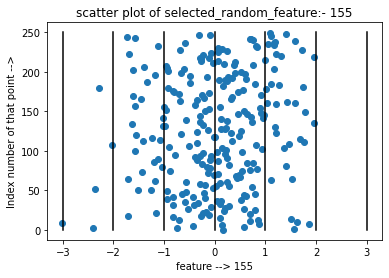

In [ ]:
#ploting any random continuous varible feature scatter plot
#########################################################################################
# https://docs.python.org/3/library/random.html
selected_random_feature=random.randint(0,299)
#########################################################################################
print("#"*100)
print("selected_random_feature:- ",selected_random_feature)
print("#"*100)
##########################################################################################
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title("scatter plot of "+"selected_random_feature:- "+str(selected_random_feature))
plt.scatter(df_train[str(selected_random_feature)],list(range(0,len(df_train))))
plt.xlabel("feature --> "+str(selected_random_feature))
plt.ylabel("Index number of that point -->")
#plotting x=0,1,-1,2,-2 line for better visualization
plt.plot([0,0],[0,len(df_train)],color="black")
plt.plot([-1,-1],[0,len(df_train)],color="black")
plt.plot([1,1],[0,len(df_train)],color="black")
plt.plot([-2,-2],[0,len(df_train)],color="black")
plt.plot([2,2],[0,len(df_train)],color="black")
plt.plot([-3,-3],[0,len(df_train)],color="black")
plt.plot([3,3],[0,len(df_train)],color="black")
plt.show()

Observation:-</br></br>
From this scatter plot of randomly selected feature, it is being ovserved that large set of data points lies in the range of **-1 to 1** and also almost all the points are in the range of -2 to 2, although their are some points like 10-15 points which has value greater the 2 and less then -2 and very few points have the value which is less then 3 or either greater then 3, and also like in linear plot observation it is being observed here also that it is **symmetric** about value x=0 {zero}

In [ ]:
#General statistical information of data set
#https://numpy.org/doc/stable/reference/generated/numpy.array.html
#https://numpy.org/doc/stable/reference/generated/numpy.mean.html
print(*list(map(lambda i: f"Mean of continuous variable feature {i} is :- {np.mean(np.array(df_train[str(i)]))}",range(300))),sep="\n")

Mean of continuous variable feature 0 is :- 0.023291999999999997
Mean of continuous variable feature 1 is :- -0.026871999999999997
Mean of continuous variable feature 2 is :- 0.167404
Mean of continuous variable feature 3 is :- 0.0019040000000000142
Mean of continuous variable feature 4 is :- 0.001587999999999994
Mean of continuous variable feature 5 is :- -0.007303999999999999
Mean of continuous variable feature 6 is :- 0.032052000000000004
Mean of continuous variable feature 7 is :- 0.07841199999999998
Mean of continuous variable feature 8 is :- -0.036920000000000015
Mean of continuous variable feature 9 is :- 0.03544799999999997
Mean of continuous variable feature 10 is :- -0.005031999999999983
Mean of continuous variable feature 11 is :- 0.11024799999999998
Mean of continuous variable feature 12 is :- 0.019807999999999992
Mean of continuous variable feature 13 is :- -0.0011079999999999935
Mean of continuous variable feature 14 is :- -0.01628000000000001
Mean of continuous variable 

Observation:-</br></br>
Mean value of amost all the continuous varaiable features 0-299 is almost zero, altough they are not exactly zero but they are very close to zero either from the negative axis or positive axis

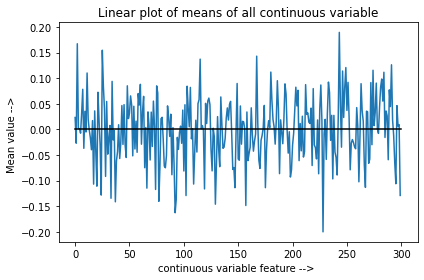

****************************************************************************************************


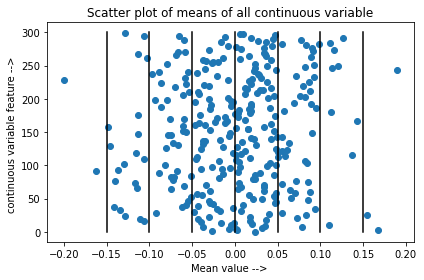

In [ ]:
#plotting linear plot of means of  all continuous variable
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(list(map(lambda i: np.mean(np.array(df_train[str(i)])),range(300))))
# plotting y=0 for better visualization
plt.plot([0,300],[0,0],color="black")
plt.title("Linear plot of means of all continuous variable")
plt.xlabel("continuous variable feature --> ")
plt.ylabel("Mean value --> ")
plt.tight_layout()
plt.show()
print("*"*100)
###############################################################################################################################
#plotting scatter plot of means of  all continuous variable
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(list(map(lambda i: np.mean(np.array(df_train[str(i)])),range(300))),list(range(300)))
plt.title("Scatter plot of means of all continuous variable")
plt.ylabel("continuous variable feature --> ")
plt.xlabel("Mean value --> ")
#plotting x=0,0.05,-0.05,0.1,-0.1,0.15,-0.15 line for better visualization
plt.plot([0,0],[0,300],color="black")
plt.plot([0.05,0.05],[0,300],color="black")
plt.plot([-0.05,-0.05],[0,300],color="black")
plt.plot([0.1,0.1],[0,300],color="black")
plt.plot([-0.1,-0.1],[0,300],color="black")
plt.plot([0.15,0.15],[0,300],color="black")
plt.plot([-0.15,-0.15],[0,300],color="black")
plt.tight_layout()
plt.show()

Observation:- <br></br>
From the Above two Linear and scatter plot of mean value of all continuous variable feature 0-299 it is being observed that most of the mean value of all continuous variable is in the range of **-0.10 to 0.10** while there are few points which are not in the range of -0.15 to 0.15, and also minumum and maximum mean values are **-0.22 and 0.18** aprox respectively. Also all the values are very close to 0 {zero}. 

Also it is equally symmetrically distributed that is the number of points in the range 0 to 0.05 is aproximately equal to number of points in the range -0.05 to 0 similarly the number of points in the range 0.05 to 0.10 and -0.1 to -0.05, 0.1 to 0.15 and -0.15 to -0.1, less then -0.15 and greater then 0.15 are aproximately equal

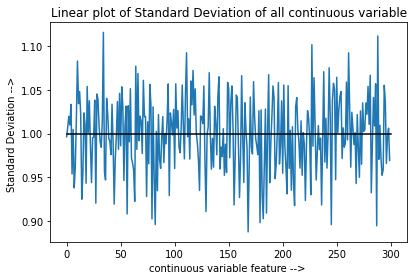

****************************************************************************************************


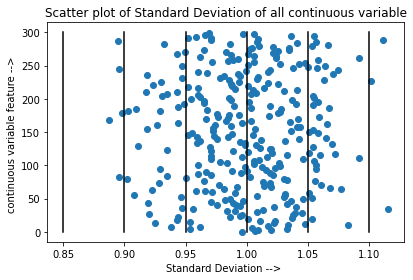

In [ ]:
#plotting linear plot of Standard Deviation of  all continuous variable
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(list(map(lambda i: np.std(np.array(df_train[str(i)])),range(300))))
# plotting y=1 for better visualization
plt.plot([0,300],[1,1],color="black")
plt.title("Linear plot of Standard Deviation of all continuous variable")
plt.xlabel("continuous variable feature --> ")
plt.ylabel("Standard Deviation --> ")
plt.tight_layout()
plt.show()
print("*"*100)
###############################################################################################################################
#plotting scatter plot of Standard Deviation of  all continuous variable
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(list(map(lambda i: np.std(np.array(df_train[str(i)])),range(300))),list(range(300)))
plt.title("Scatter plot of Standard Deviation of all continuous variable")
plt.ylabel("continuous variable feature --> ")
plt.xlabel("Standard Deviation --> ")
#plotting x=0.85,0.9,0.95,1,1.05,1.1 line for better visualization
plt.plot([0.85,0.85],[0,300],color="black")
plt.plot([0.9,0.9],[0,300],color="black")
plt.plot([0.95,0.95],[0,300],color="black")
plt.plot([1,1],[0,300],color="black")
plt.plot([1.05,1.05],[0,300],color="black")
plt.plot([1.1,1.1],[0,300],color="black")
plt.tight_layout()
plt.show()

Observation:- <br></br>
As from above linear plot and scatter plot of all Standard Deviation i observe that most of the Standard Deviation of continuous variable feature is in the range of **0.90 to 1.10** while there are few points present which are not in the range of 0.90 to 1.10, and also  maximum and minumum Standard Deviation are **1.12 and 0.89** aprox respectively. Also all the value are very close to 1 {one}

This distribution of Standard Deviation is also equally likely symmetrically distributed i.e the number of Standard Deviations in the interval 0.95 to 1 and 1 to 1.05 , 0.9 to 0.95 and 1.05 to 1.10 , value less the 0.9 and greater then 1.10 are aproximately same

Note:-</br></br>
From all the above observation that we made, the data points follow similar distibution,symmetry in distribution. Also mean value and standard deviation observation tends out to be close to 0 and 1 respectively, it clearly gives us the hint that all the continuous vairable feature might belong to standard normal gaussian distribution. 

 **Multivariate Analysis**

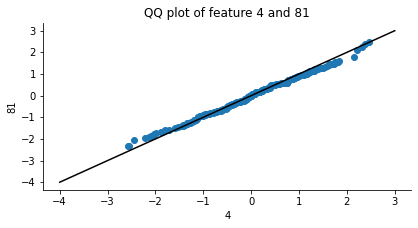

****************************************************************************************************


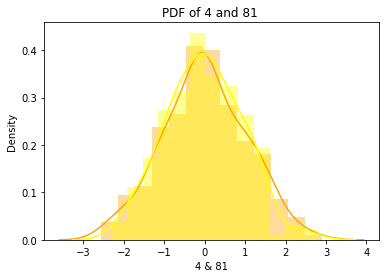

In [ ]:
#randomly selecting 2 features
#https://docs.python.org/3/library/random.html
randomly_selected_feature_one,randomly_selected_feature_two=random.sample(list(range(300)),2)
##############################################################################################################################
#pplot from seaborn_qqplot
#https://seaborn-qqplot.readthedocs.io/en/latest/
#Note you might need to install seaborn_qqplot
qq_plot(df_train, x=str(randomly_selected_feature_one), y=str(randomly_selected_feature_two), kind='qq',height=3, aspect=2)
plt.title(f"QQ plot of feature {randomly_selected_feature_one} and {randomly_selected_feature_two}")
#ploting y=x line from (-4,-4) to (3,3) for better visualization
plt.plot([-4,3],[-4,3],color="black")
plt.show()
print("*"*100)
###############################################################################################################################
#PDF of randomly_selected_feature_one and randomly_selected_feature_two
#https://seaborn.pydata.org/generated/seaborn.displot.html
sns.distplot(df_train[str(randomly_selected_feature_one)],color="orange")
sns.distplot(df_train[str(randomly_selected_feature_two)],color="yellow")
plt.title(f"PDF of {randomly_selected_feature_one} and {randomly_selected_feature_two} ")
plt.xlabel(f"{randomly_selected_feature_one} & {randomly_selected_feature_two}")
plt.show()

Observation:</br></br>
After running the cell few times, i observed that all the continuous varaible feature 0-299 have same distrition beacuse in the QQ plot the points are approximately along y=x reference line also their PDF is completly overlapping, also it tends out to be standard normal gaussian distribution as from the above observation of randomly selected feature it seems to be like symmetric, bell shape curve with mean 0 and standard deviation 1 approximately as we observed already in univarte analysis.

 **CORRELATION**

In [ ]:
# Here we are finnding the Spearman Rank correlation cofficient using scipy library for all the 0-299 continuous variable with each other
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
Spearman_Rank_Correlation_cofficient_Matrix=list(map(lambda i: list(map(lambda j: scipy.stats.spearmanr(df_train[str(i)],df_train[str(j)])[0],range(300))),range(300)))

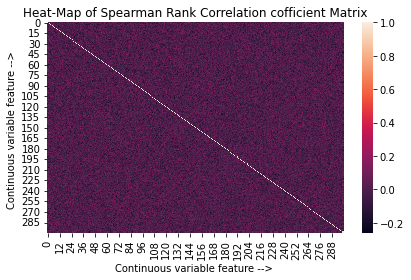

In [ ]:
# Plotting Heat-Map of Spearman Rank Correlation cofficient Matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title("Heat-Map of Spearman Rank Correlation cofficient Matrix")
sns.heatmap(Spearman_Rank_Correlation_cofficient_Matrix)
plt.xlabel("Continuous variable feature --> ")
plt.ylabel("Continuous variable feature --> ")
plt.tight_layout()
plt.show()

Observation:-</br></br>
As i used Spearman Rank Correlation cofficient  to find the correlation between two continuous variable features, which is appropriate for both continuous and discrete ordinal variables, still none of the 0-299 random continuous variable features are correlated either linearly or with some special distribution,  because the Heat map plot is very dark in color and most of the value is in the range of **-0.2 to 0.2**.

In [ ]:
# Here we are finnding the Spearman Rank correlation cofficient using scipy library for all the 0-299 continuous variable with target
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
Spearman_Rank_Correlation_cofficient_Matrix_with_target=list(map(lambda i: abs(scipy.stats.spearmanr(df_train[str(i)],df_train["target"])[0]),range(300)))

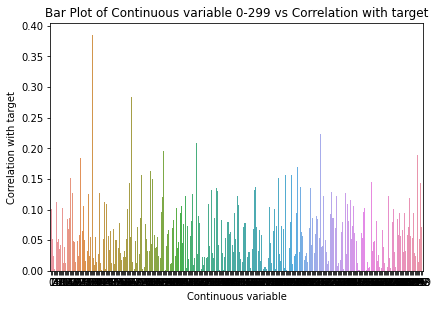

####################################################################################################
Top Ten Continuous variable feature which are highly correlated to target: - 
  --> Continuous variable 33 
  --> Continuous variable 65 
  --> Continuous variable 217 
  --> Continuous variable 117 
  --> Continuous variable 91 
  --> Continuous variable 295 
  --> Continuous variable 24 
  --> Continuous variable 199 
  --> Continuous variable 80 
  --> Continuous variable 73 


In [ ]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x=list(range(300)),y=Spearman_Rank_Correlation_cofficient_Matrix_with_target)
plt.tight_layout()
plt.title("Bar Plot of Continuous variable 0-299 vs Correlation with target")
plt.xlabel("Continuous variable")
plt.ylabel("Correlation with target")
plt.show()
print("#"*100)
#######################################################################################################################
# top 10 Continuous variable 0-299 features correlated to target
#https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
print("Top Ten Continuous variable feature which are highly correlated to target: - ")
print(*list(map(lambda i: f"  --> Continuous variable {i} ",np.argsort(np.array(Spearman_Rank_Correlation_cofficient_Matrix_with_target))[-1:-11:-1])),sep="\n")

Observation:-</br></br>
From the Above Bar Plot of Continuous variable 0-299 vs Correlation with target it is being clearly observed that most of the absolute value of Spearman Rank correlation cofficient is **less then 0.10** while their are some 20-25 Continuous variable feature whose absolute value of Spearman Rank correlation cofficient is greater then 0.10, altough none of the feature is much correlated to target as their correlation cofficient is **very less in magnitude** i.e less then 0.8.

# Featurization

Here we will be creating some more features based on already existing Feature  

In [5]:
print("*"*150)
#ceiling value of minimum
print("Spearman Rank Correlation between between the ceiling value of minimum value in the row with our target is: -->",end=" ")
print(scipy.stats.spearmanr( list(map(lambda x: math.ceil(min(x)) ,np.array(df_train[list(map(str,range(300)))]))) ,df_train["target"] )[0])
######################################################################################################################################################
print("*"*150)
#mean value
print("Spearman Rank Correlation between between the mean value with our target is: -->",end=" ")
print(scipy.stats.spearmanr( list(map(lambda x: np.mean(x) ,np.array(df_train[list(map(str,range(300)))]))) ,df_train["target"] )[0])
######################################################################################################################################################
print("*"*150)
#sum
print("Spearman Rank Correlation between between the sum of all the value in the row with our target is: -->",end=" ")
print(scipy.stats.spearmanr( list(map(lambda x: np.sum(x) ,np.array(df_train[list(map(str,range(300)))]))) ,df_train["target"] )[0])
######################################################################################################################################################
print("*"*150)
#multiplication of maximum & mean
print("Spearman Rank Correlation between between the multiplication of maximum & mean values of each row with our target is: -->",end=" ")
print(scipy.stats.spearmanr( list(map(lambda x: np.max(x)*np.mean(x) ,np.array(df_train[list(map(str,range(300)))]))) ,df_train["target"] )[0])
######################################################################################################################################################
print("*"*150)
#multiplication of minimum value & sum
print("Spearman Rank Correlation between between the multiplication of minimum value & sum of values in the row with our target is: -->",end=" ")
print(scipy.stats.spearmanr( list(map(lambda x: np.min(x)*np.sum(x) ,np.array(df_train[list(map(str,range(300)))]))) ,df_train["target"] )[0])
######################################################################################################################################################
print("*"*150)
#Top Ten percentile which are more correlated with our target 
print("Top Ten percentile which are more correlated with our target is: -->",end="\n")
p=list(map(lambda i:scipy.stats.spearmanr( list(map(lambda x: np.percentile(x,q=i) ,np.array(df_train[list(map(str,range(300)))]))) ,df_train["target"] )[0],range(101)))
for top_percetile in np.argsort(p)[-1:-11:-1]: print(top_percetile,"-->",p[top_percetile])
print("*"*150)
######################################################################################################################################################

******************************************************************************************************************************************************
Spearman Rank Correlation between between the ceiling value of minimum value in the row with our target is: --> -0.10653094189060011
******************************************************************************************************************************************************
Spearman Rank Correlation between between the mean value with our target is: --> -0.17470758912308443
******************************************************************************************************************************************************
Spearman Rank Correlation between between the sum of all the value in the row with our target is: --> -0.17470758912308443
******************************************************************************************************************************************************
Spearman Rank Correlation between betw

NOTE:- </br></br>

I had came across this 5 features </br>
*  Ceiling value of minimum
*  Mean value
*  Sum
*  Multiplication of maximum & mean
*  Multiplication of minimum & sum 

which are likely to have similar correlation with target values as compared to other existing 0-299 continuous varibale, so i would like to test this feature in terms of model performance.

In [6]:
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#STANDARD SCALING

In [7]:
#checking wheater all the above mentioned featurization will work or not
scaler = StandardScaler().fit(df_train[list(map(str,range(300)))])
scaled_train_dataset=pd.DataFrame(scaler.transform(df_train[list(map(str,range(300)))]))
scaled_test_dataset=pd.DataFrame(scaler.transform(df_test[list(map(str,range(300)))]))
##################################################################################################################################################
##################################################################################################################################################
##################################################################################################################################################
#adding new features to train
scaled_train_dataset["ceil_min"]=list(map(lambda x: math.ceil(min(x)) ,scaler.transform(df_train[list(map(str,range(300)))])))
scaled_train_dataset["mean"]=list(map(lambda x: np.mean(x) ,np.array(df_train[list(map(str,range(300)))])))
scaled_train_dataset["sum"]=list(map(lambda x: np.sum(x) ,scaler.transform(df_train[list(map(str,range(300)))])))
scaled_train_dataset["max_x_mean"]=list(map(lambda x: np.max(x)*np.mean(x) ,scaler.transform(df_train[list(map(str,range(300)))])))
scaled_train_dataset["min_x_sum"]=list(map(lambda x: np.min(x)*np.sum(x) ,scaler.transform(df_train[list(map(str,range(300)))])))
##################################################################################################################################################
##################################################################################################################################################
##################################################################################################################################################
#adding new features to test
scaled_test_dataset["ceil_min"]=list(map(lambda x: math.ceil(min(x)) ,scaler.transform(df_test[list(map(str,range(300)))])))
scaled_test_dataset["mean"]=list(map(lambda x: np.mean(x) ,scaler.transform(df_test[list(map(str,range(300)))])))
scaled_test_dataset["sum"]=list(map(lambda x: np.sum(x) ,scaler.transform(df_test[list(map(str,range(300)))])))
scaled_test_dataset["max_x_mean"]=list(map(lambda x: np.max(x)*np.mean(x) ,scaler.transform(df_test[list(map(str,range(300)))])))
scaled_test_dataset["min_x_sum"]=list(map(lambda x: np.min(x)*np.sum(x) ,scaler.transform(df_test[list(map(str,range(300)))])))

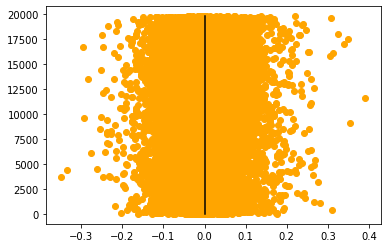

In [8]:
fea=list(map(str,range(300)))+["ceil_min","mean","sum","max_x_mean","min_x_sum"]
plt.scatter(x=list(map(np.mean,np.array(scaled_test_dataset))),y=list(range(len(scaled_test_dataset))),color="orange")
plt.plot([0,0],[0,len(scaled_test_dataset)+1],color="black")
plt.show()

#LGBM+RF+LG

### LGBM

In [58]:
#Training from LGBM
##################################################################################################
#tuning
model = LGBMClassifier()
params={"n_estimators":[3,11,21,25,45,65,85,101],
        "learning_rate": [0.001,0.01,0.1,1]}
clf = GridSearchCV(model, params)
clf.fit(scaled_train_dataset, np.array(df_train["target"]))
###################################################################################################
#training best model with best parameter 
best=clf.best_params_
clf=LGBMClassifier(n_estimators=best["n_estimators"],learning_rate=best["learning_rate"])
clf.fit(scaled_train_dataset, np.array(df_train["target"]))
###################################################################################################
#probabilistic perdiction on test with best 200 feature
rfe = RFE(estimator=clf, n_features_to_select=200)
rfe.fit(scaled_train_dataset,df_train["target"])
prediction_LGBM = rfe.predict_proba(scaled_test_dataset)[:,1]

In [36]:
#perdiction on test
sample_submission=pd.read_csv("/content/drive/MyDrive/Case Study 1/sample_submission.csv")
sample_submission["target"]=prediction_LGBM
sample_submission.to_csv("LGBM_RESULT.csv",index=False)

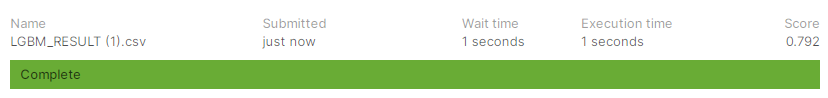

In [60]:
#saving LGBM model as an pickle file
import pickle
model_name = "LGBM.pkl"
with open(model_name, 'wb') as file: pickle.dump(rfe, file)

## XGBoost

In [55]:
#Training from Xgboost
###############################################################################################################################
#tuning
model = XGBClassifier(random_state=42)
param = {'learning_rate': [0.001,0.01,0.1, 10], 'max_depth': [3,5,7,11],'n_estimators': [500]}
clf = GridSearchCV(model, param)
clf.fit(scaled_train_dataset,df_train["target"])
###############################################################################################################################
#training best model with best parameters 
best=clf.best_params_
clf = XGBClassifier(earning_rate= best["learning_rate"], max_depth= best["max_depth"], n_estimators= 500)
clf.fit(scaled_train_dataset,df_train["target"])
###############################################################################################################################
#probabilistic perdiction on test with best 200 feature
rfe = RFE(estimator=clf, n_features_to_select=200)
rfe.fit(scaled_train_dataset,df_train["target"])
predicted_xgb = rfe.predict_proba(scaled_test_dataset)[:,1]

In [34]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Case Study 1/sample_submission.csv")
sample_submission["target"]=predicted_xgb
sample_submission.to_csv("XGB_RESULT.csv",index=False)

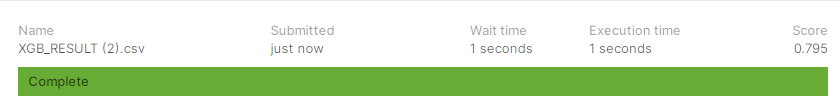

In [57]:
#saving XGBoost model as an pickle file
import pickle
model_name = "XGBoost.pkl"
with open(model_name, 'wb') as file: pickle.dump(rfe, file)

## Logistic Regression

In [61]:
#Training from Logistic Regression
############################################################################################################
#tuning
model = LogisticRegression(random_state=42)
params= {'penalty' : ['l2','l1'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(model, params)
clf.fit(scaled_train_dataset,df_train["target"])
#############################################################################################################
#training best model with best parameters 
best=clf.best_params_
clf = LogisticRegression(C= best["C"], penalty= best["penalty"])
clf.fit(scaled_train_dataset,df_train["target"])
#############################################################################################################
#probabilistic perdiction on test with best 200 feature
rfe = RFE(estimator=clf, n_features_to_select=200)
rfe.fit(scaled_train_dataset,df_train["target"])
predicted_LG = rfe.predict_proba(scaled_test_dataset)[:,1]

In [38]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Case Study 1/sample_submission.csv")
sample_submission["target"]=predicted_LG
sample_submission.to_csv("LG_RESULT.csv",index=False)

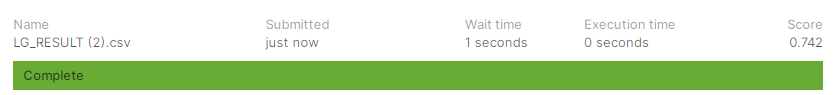

In [63]:
#saving logistic model as an pickle file
import pickle
model_name = "LG.pkl"
with open(model_name, 'wb') as file: pickle.dump(rfe, file)

# Ensembling

In [45]:
prediction= (prediction_LGBM *0.33 + predicted_xgb * 0.33 + predicted_LG*0.33)
# creating a csv file for submission in kaggle
sample_submission=pd.read_csv("/content/drive/MyDrive/Case Study 1/sample_submission.csv")
sample_submission["target"]=prediction
sample_submission.to_csv("Result_final.csv",index=False)

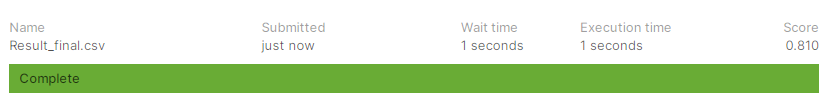

In [51]:
pd.DataFrame([["LGBM",.792],["XGBoost",.795],["Logistic_regression",.742],["LGBM+XGB+LG",.810]],
             columns=["Model_Name","TEST_AUC"],
             index=["Model 1","Model 2","Model 3","Model 4"])

,Model_Name,TEST_AUC
Model 1,LGBM,0.792
Model 2,XGBoost,0.795
Model 3,Logistic_regression,0.742
Model 4,LGBM+XGB+LG,0.810


Observation:-</br></br>
After Ensembling of LGBM , XGBoost, Logistic_Regression Model, Performace of resultend model increase on test data </br>
Note:- Train AUC score of all the model is 1